<a href="https://colab.research.google.com/github/lisamadeddu/lisa-PRA3024/blob/main/UP_LM_LHCb_2025_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [1]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.4/871.4 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=f1ed95a8e2ce16d33ae7df26af73a8bdffb0629462fbae86368c5fb0bb14333a
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [3]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you

*   List item
*   List item

get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [4]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetUp.root
# If we ALL do this too often, CERN will block our IP address....

mv: cannot stat 'B2HHH_MagnetDown.root': No such file or directory


In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("B2HHH_MagnetUp (1).root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

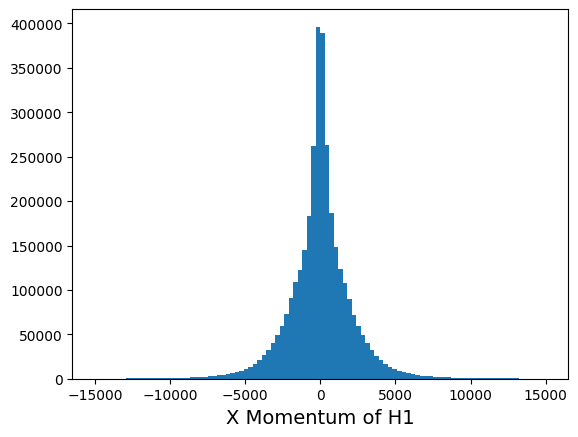

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


Text(0, 0.5, 'Number of events')

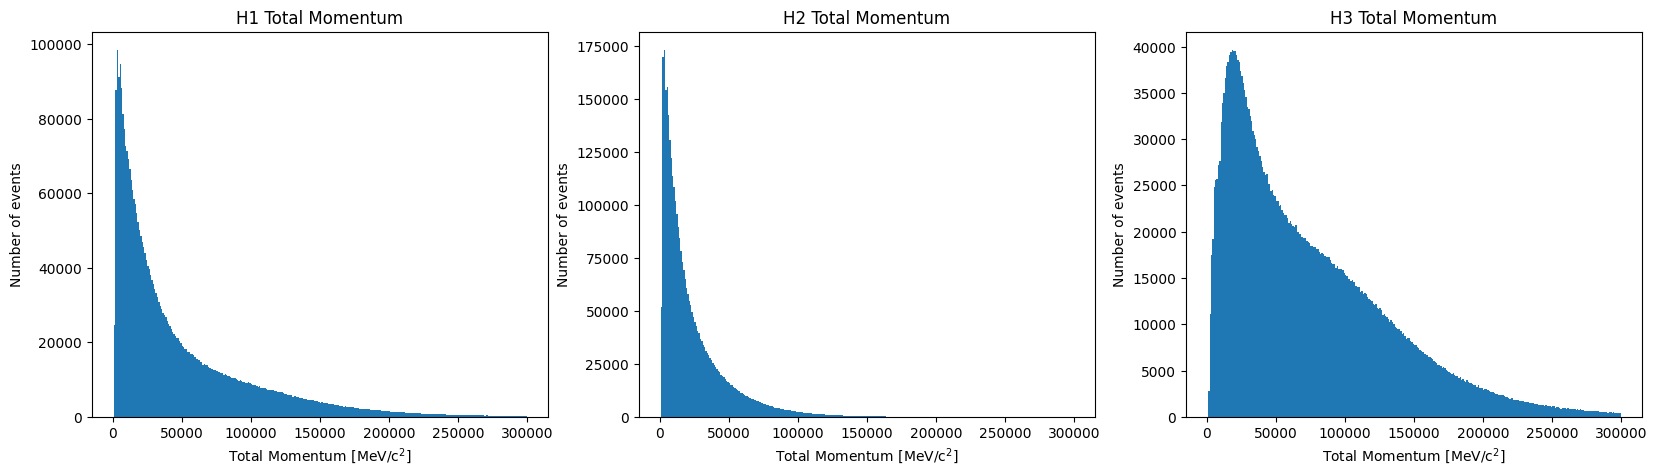

In [10]:
#import numpy as np
%pip install boost-histogram
import math
from numpy import sqrt
#import ROOT
import uproot
from matplotlib import pyplot as plt
import boost_histogram as bh

# extract momentum components from datasent for each daughter particle

# daughter particle 1
xmomentum_H1 = f["DecayTree//H1_PX"].array() # x component of momentum
ymomentum_H1 = f["DecayTree//H1_PY"].array() # y component of momentum
zmomentum_H1 = f["DecayTree//H1_PZ"].array() # z component of momentum
H1_Ptot = np.sqrt((xmomentum_H1**2)+(ymomentum_H1**2)+(zmomentum_H1**2)) # total

# daughter particle 2
xmomentum_H2 = f["DecayTree//H2_PX"].array()
ymomentum_H2 = f["DecayTree//H2_PY"].array()
zmomentum_H2 = f["DecayTree//H2_PZ"].array()
H2_Ptot = np.sqrt((xmomentum_H2**2)+(ymomentum_H2**2)+(zmomentum_H2**2))

# daughter particle 3
xmomentum_H3 = f["DecayTree//H3_PX"].array()
ymomentum_H3 = f["DecayTree//H3_PY"].array()
zmomentum_H3 = f["DecayTree//H3_PZ"].array()
H3_Ptot = np.sqrt((xmomentum_H3**2)+(ymomentum_H3**2)+(zmomentum_H3**2))

# figure for subsplotting of total momentum distributions
fig=plt.figure(figsize=(20,5))
# plot for h1_ptot
plt.subplot(1,3,1)
histPtot1 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot1.fill(H1_Ptot)
plt.bar(histPtot1.axes[0].centers, histPtot1.values(), width=histPtot1.axes[0].widths)
plt.title('H1 Total Momentum')
plt.xlabel('Total Momentum [MeV/c$^2$]')
plt.ylabel('Number of events')
# plot for h2_ptot
plt.subplot(1,3,2)
histPtot2 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot2.fill(H2_Ptot)
plt.bar(histPtot2.axes[0].centers, histPtot2.values(), histPtot2.axes[0].widths)
plt.title('H2 Total Momentum')
plt.xlabel('Total Momentum [MeV/c$^2$]')
plt.ylabel('Number of events')
# plot for h3_ptot
plt.subplot(1,3,3)
histPtot3 = bh.Histogram(bh.axis.Regular(300,0,300000))
histPtot3.fill(H3_Ptot)
plt.bar(histPtot3.axes[0].centers, histPtot3.values(), histPtot3.axes[0].widths)
plt.title('H3 Total Momentum')
plt.xlabel('Total Momentum [MeV/c$^2$]')
plt.ylabel('Number of events')

**Interpretation of results:**
The histograms show the distribution of total momentum for the 3 daughter particles (H1, H2, and H3) resulting from B-meson decay.
- H1 and H2 especially show sharp peaks at low momentum and a long tail that thins out at higher momentums --> most of these particles are produced with low momentum, but some may still be produced with significantly higher.
- H3 shows a similar pattern, but with a broader distribution and a peak at a higher momentum than H1 or H2 --> H3 is most likely more energetic.


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Text(0, 0.5, 'Number of events')

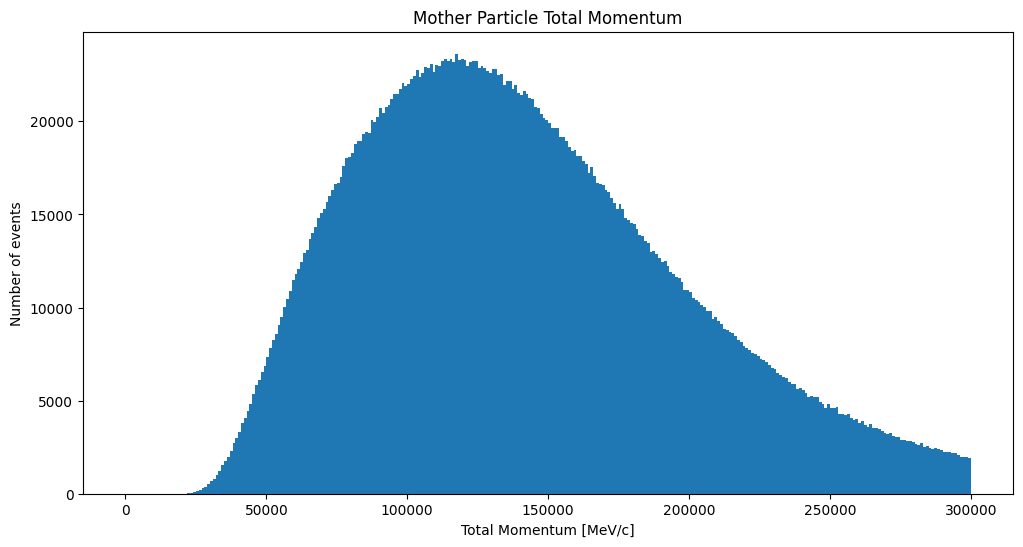

In [11]:
# compute total momentum of mother particle (B-meson) using principle of momentum conservation
M_Ptot = np.sqrt((xmomentum_H1 + xmomentum_H2 + xmomentum_H3)**2 +(ymomentum_H1 + ymomentum_H2 + ymomentum_H3)**2 +(zmomentum_H1 + zmomentum_H2 + zmomentum_H3)**2)

# plotting histogram of total momentum distribution of mother particle
plt.figure(figsize=(12,6))
histM_Ptot = bh.Histogram(bh.axis.Regular(300, 0, 300000))
histM_Ptot.fill(M_Ptot)
plt.bar(histM_Ptot.axes[0].centers, histM_Ptot.values(), histM_Ptot.axes[0].widths)
plt.title('Mother Particle Total Momentum')
plt.xlabel('Total Momentum [MeV/c]')
plt.ylabel('Number of events')

**Interpretation of plot**:
 - The distribution has a peak at around 100,000-130,000 MeV/C --> most B-mesons have total momenta in this range
 - Longer tail as momentum increases shows that some B-mesons are produced with significantly more momenta
 - B-mesons are produced in high-energy collisions, so the low amount of B-mesons produced before around 50,000 MeV/C is expected (source: https://www.energy.gov/science/np/articles/scientists-study-how-bc-mesons-form-gain-more-information-ultra-relativistic)

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
Events = f['DecayTree']
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s"% (branch, value))

Event number #45
-------------------
B_FlightDistance  :  4.714065519134621
B_VertexChi2  :  11.527835642103977
H1_PX  :  133.37597488306847
H1_PY  :  -1293.522713059599
H1_PZ  :  33534.216564227696
H1_ProbK  :  0.007352352142333984
H1_ProbPi  :  0.20490717887878418
H1_Charge  :  1
H1_IPChi2  :  22.988488167413408
H1_isMuon  :  0
H2_PX  :  518.942836815797
H2_PY  :  -1966.1964311195359
H2_PZ  :  52184.74396649723
H2_ProbK  :  0.004820436239242554
H2_ProbPi  :  0.26665544509887695
H2_Charge  :  -1
H2_IPChi2  :  20.56519869481346
H2_isMuon  :  0
H3_PX  :  1383.6240376483754
H3_PY  :  -2008.3497468201033
H3_PZ  :  12153.955489049204
H3_ProbK  :  0.08002465963363647
H3_ProbPi  :  0.4037107229232788
H3_Charge  :  -1
H3_IPChi2  :  1584.9516601284706
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [13]:
# define kaon mass in MeV/c^2
mass_kaon=493.677

# calculate energy for each kaon
H1_E=np.sqrt(H1_Ptot**2+mass_kaon**2)
H2_E=np.sqrt(H2_Ptot**2+mass_kaon**2)
H3_E=np.sqrt(H3_Ptot**2+mass_kaon**2)

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Text(0, 0.5, 'Number of events')

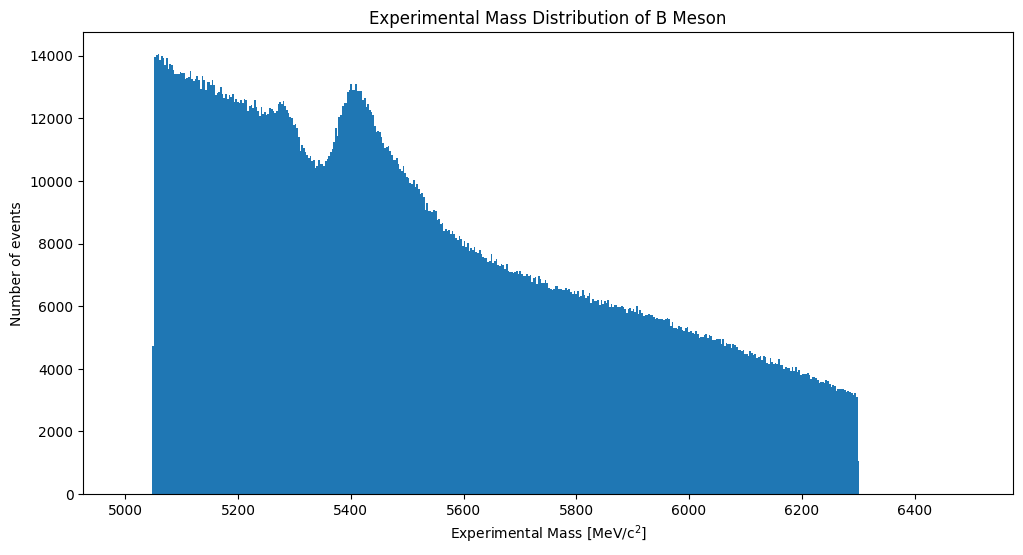

In [14]:
# calculate experimental mass of mother particle
experimental_mass=np.sqrt(((H1_E+H2_E+H3_E)**2)-(M_Ptot**2))

# histogram plot for experimental mass distribution
plt.figure(figsize=(12,6))
hist_mass = bh.Histogram(bh.axis.Regular(500, 5000, 6500))
hist_mass.fill(experimental_mass) # fills with calculated experimental mass vals
plt.bar(hist_mass.axes[0].centers, hist_mass.values(), hist_mass.axes[0].widths)
plt.title('Experimental Mass Distribution of B Meson')
plt.xlabel('Experimental Mass [MeV/c$^2$]')
plt.ylabel('Number of events')

**Interpretation of plot**:
- Peak at around 5,200 MeV/c$^2$ and at 5,400 MeV/c$^2$ --> represents signal, which are the events where the particles origniated from actual B meson decays
- Distribution is not sharply peaked, significant spread --> may come from background contamination, where detected particles come from different events

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

<ipython-input-15-64caa6e9ed3e>:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist([H1_ProbK,H2_ProbK,H3_ProbK],300,(0,1))
<ipython-input-15-64caa6e9ed3e>:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist([H1_ProbPi,H2_ProbPi,H3_ProbPi],300,(0,1))


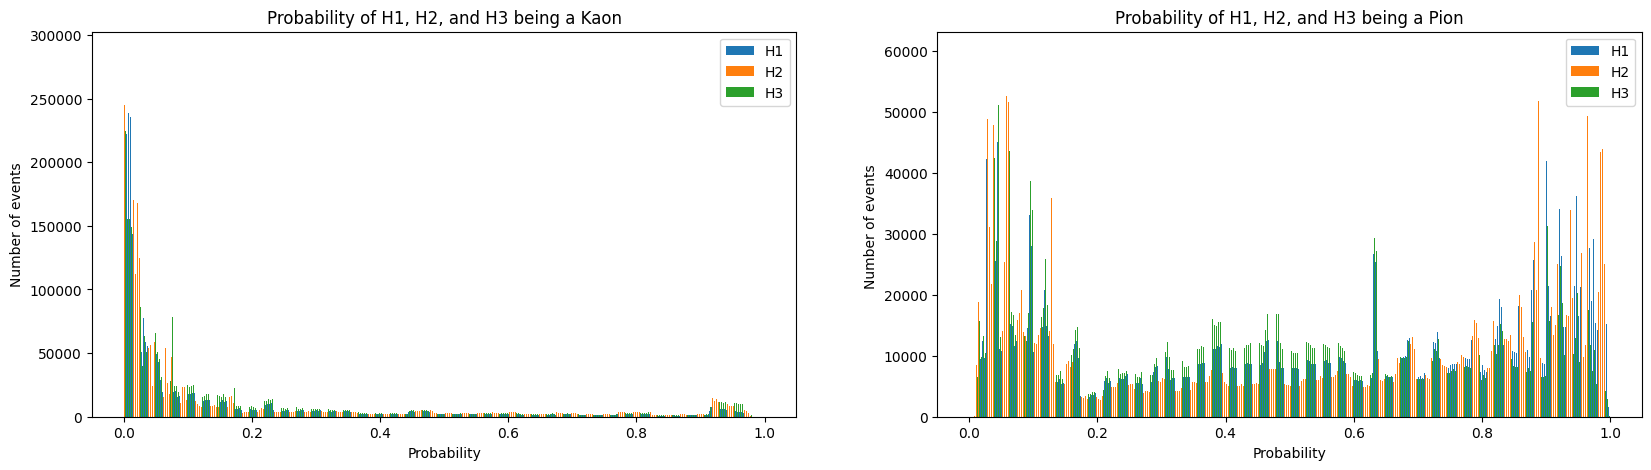

<ipython-input-15-64caa6e9ed3e>:34: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(B_VertexChi2,300,(0,13))


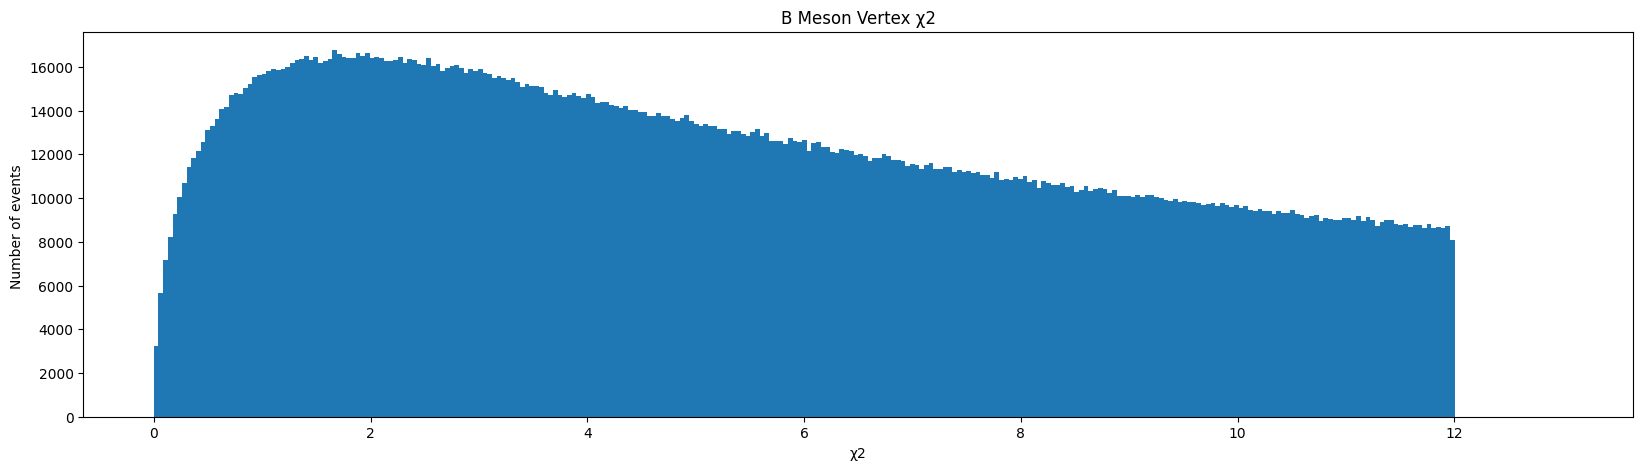

In [15]:
# extract proabibility of H1, H2, and H3 being a kaon
H1_ProbK = f["DecayTree//H1_ProbK"].array()
H2_ProbK = f["DecayTree//H2_ProbK"].array()
H3_ProbK = f["DecayTree//H3_ProbK"].array()

# extract probability of H1, H2, and H3 being a pion
H1_ProbPi = f["DecayTree//H1_ProbPi"].array()
H2_ProbPi = f["DecayTree//H2_ProbPi"].array()
H3_ProbPi = f["DecayTree//H3_ProbPi"].array()

# create figure for plotting subplots of probabilities
fig=plt.figure(figsize=(20,5))
# kaon probability distribution
plt.subplot(1,2,1)
plt.hist([H1_ProbK,H2_ProbK,H3_ProbK],300,(0,1))
plt.title("Probability of H1, H2, and H3 being a Kaon")
plt.ylabel("Number of events")
plt.xlabel("Probability")
plt.legend(('H1','H2','H3'))

# pion probability distribution
plt.subplot(1,2,2)
plt.hist([H1_ProbPi,H2_ProbPi,H3_ProbPi],300,(0,1))
plt.title("Probability of H1, H2, and H3 being a Pion")
plt.ylabel("Number of events ")
plt.xlabel("Probability")
plt.legend(('H1','H2','H3'))
plt.show()

# extract B meson vertex chi-squared vals
B_VertexChi2 = f["DecayTree//B_VertexChi2"].array()
# plot B meson vertex chi-squared distribution
plt.figure(figsize=(20,5))
plt.hist(B_VertexChi2,300,(0,13))
plt.title("B Meson Vertex χ2")
plt.ylabel("Number of events ")
plt.xlabel("χ2")
plt.show()

**Interpretation of plots**:

*Kaon probability plot*:
- Distribution spans almost entire range --> some events have very low or very high probability of producing Kaons
- Probability of particles being Kaons ranges is extremely variable

*Pion probability plot*:
- Distributions span almost entire range, but consistently more events in each probability sector
- Total number of events is significantly lower (y-axis range)

*B-Meson Vertex Chi-Squared distribution*:
- The vertex chi-squared is a measure of how well 3 daughter tracks can be fitted to a signel decay vertex
- Distribution seems relatively even through all values of chi-squared, with a slight peak at around 2 --> good amount of events consistent with a single B-meson decay vertex


Using these plots, we can now think about making a preselection. This has some format like the below:

In [24]:
selection = (
    (branches['H1_ProbK'] > 0.2) &
    (branches['H2_ProbK'] > 0.2) &
    (branches['H3_ProbK'] > 0.2) &
    (branches['H1_isMuon'] != 1)&
    (branches['H2_isMuon'] != 1)&
    (branches['H3_isMuon'] != 1)&
    (branches['B_VertexChi2'] < 5)
    )

selected_events = { key: branches[key][selection] for key in branches.fields }


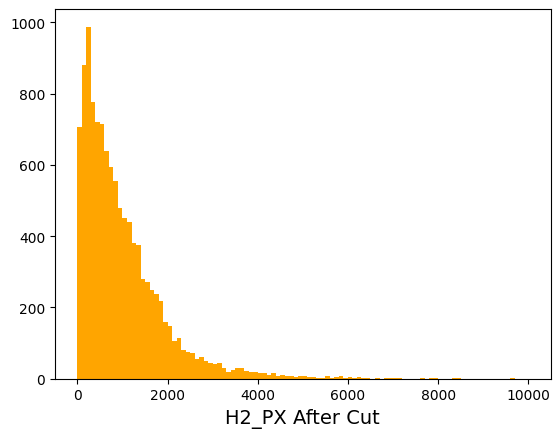

In [25]:
#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree=branches['H2_PX'][selection]
#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
plt.figure();
plt.hist (CutTree, bins=100, range=(0,10000), color='orange');
plt.xlabel('H2_PX After Cut', fontsize=14);

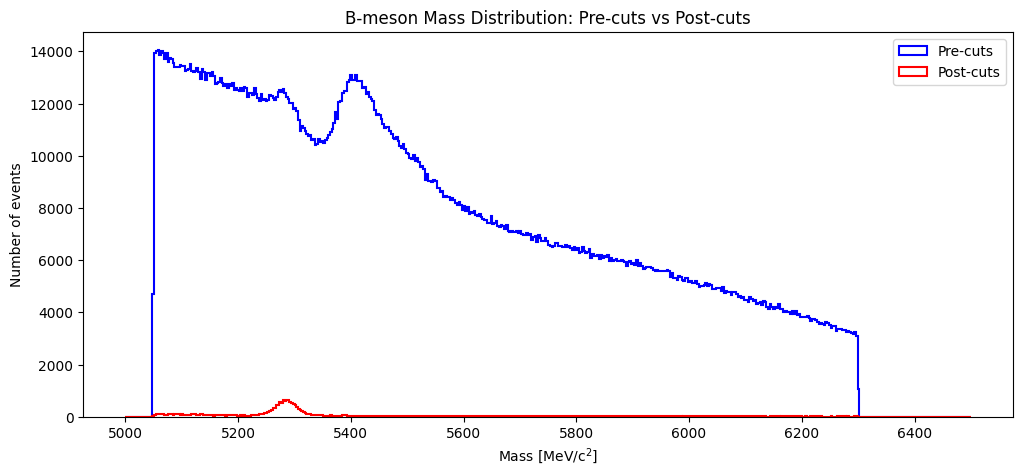

Number of events pre-cuts: 3420295
Number of events post-cuts: 23037


In [26]:
plt.figure(figsize=(12,5))
# plot mass distribution for all events (pre-cuts)
plt.hist(experimental_mass, bins=500, range=(5000,6500), histtype='step',
         label='Pre-cuts', color='blue', linewidth=1.5)

# plot mass distribution for events post-cuts
plt.hist(experimental_mass[selection], bins=500, range=(5000,6500), histtype='step',
         label='Post-cuts', color='red', linewidth=1.5)

# plot
plt.title('B-meson Mass Distribution: Pre-cuts vs Post-cuts')
plt.xlabel('Mass [MeV/c$^2$]')
plt.ylabel('Number of events')
plt.legend()
plt.show()

# print number of events pre- and post-cuts
print("Number of events pre-cuts:", len(experimental_mass))
print("Number of events post-cuts:", len(experimental_mass[selection]))


**Interpretation of B-meson mass distribution plot**:
- Blue curve represent pre-cuts --> broader distribution with many events that could contain true B-meson decays, a lot of background
- Red curve represents post-cuts --> number of events is significantly less, remaining is concentrated at lower values (around 5,300 MeV/c$^2$)
- Large reduction in events could suggest that most background events fail selection criteria, improving purity as most event shsould contain true B-meson decays
- Strict cuts improve purity but increase risk of removing real signal events

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

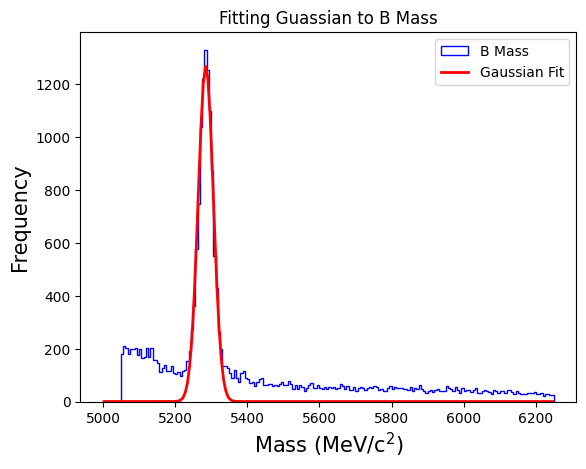

In [36]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'experimental_mass' and 'selection' are already defined
cut = experimental_mass[selection]

# Create the histogram and extract bin data
bin_height, bin_edge, _ = plt.hist(cut, bins=200, range=(5000, 6250), label="B Mass", histtype='step')
plt.close()  # Close the histogram plot to avoid overlapping plots

# Calculate bin centers and y_data (counts)
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2.0
y_data = bin_height

# Correct Gaussian function for fitting
def gauss(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2. * sigma**2))

# Use initial guesses:
# A ~ max of y_data, mu ~ mean of cut, sigma ~ std dev of cut
p0 = [max(y_data), np.mean(cut), np.std(cut)]
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=p0)

# Generate the fitted curve using the optimal parameters
yfit = gauss(x_data, *optimisedParameters)

# Plot the histogram and overlay the fitted Gaussian curve
plt.figure()
plt.hist(cut, bins=200, range=(5000, 6250), label="B Mass", histtype='step', color='blue')
plt.plot(x_data, yfit, label='Gaussian Fit', color='red', linewidth=2)
plt.xlabel("Mass (MeV/c$^2$)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Fitting Guassian to B Mass")
plt.legend()
plt.show()


<ipython-input-37-0ffb484be590>:20: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-d * x)
<ipython-input-37-0ffb484be590>:37: OptimizeWarning: Covariance of the parameters could not be estimated
  optimisedParametersfit, pcovfit = curve_fit(


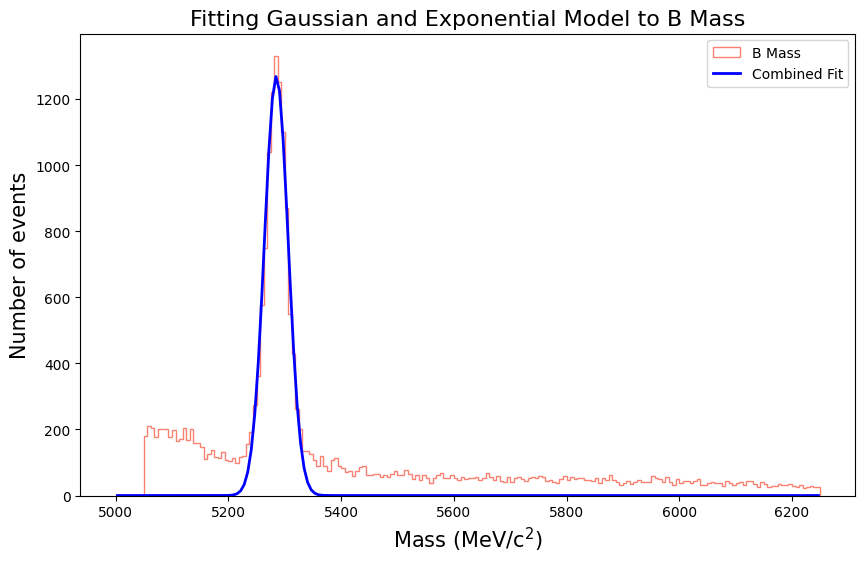

In [37]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# histogram from the selected (cut) data
bin_height, bin_edge, _ = plt.hist(cut, bins=200, range=(5000, 6250),
                                   label="B Mass", color='red', histtype='step')
plt.close()

# compute the bin centers and counts for the fit
xdata = (bin_edge[:-1] + bin_edge[1:]) / 2.0
ydata = bin_height

# define gaussian function
def gauss(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2. * sigma**2))

# define exponential function
def expo(x, c, d):
    return c * np.exp(-d * x)

# define the combined model
def combination(x, A, mu, sigma, c, d):
    return gauss(x, A, mu, sigma) + expo(x, c, d)

# set initial parameter guesses (from ChatGPT)
# gaussian initial guesses
A_initial = max(ydata)
mu_initial = np.mean(cut)
sigma_initial = np.std(cut)

# exponential initial guesses
c_initial = max(ydata) * 0.1
d_initial = 0.001

# fit the combined model
optimisedParametersfit, pcovfit = curve_fit(
    combination, xdata, ydata,
    p0=[A_initial, mu_initial, sigma_initial, c_initial, d_initial],
    maxfev=10000
)

# fitted curves for the combined model
yfit_combined = combination(xdata, *optimisedParametersfit)

# plotting
plt.figure(figsize=(10, 6))
plt.hist(cut, bins=200, range=(5000, 6250), label="B Mass",
         color='salmon', histtype='step')
plt.plot(xdata, yfit_combined, label='Combined Fit', color='blue', linewidth=2)
plt.xlabel("Mass (MeV/c$^2$)", fontsize=15)
plt.ylabel("Number of events", fontsize=15)
plt.title('Fitting Gaussian and Exponential Model to B Mass', fontsize=16)
plt.legend()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

# Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [19]:
import numpy as np

# load data for each daughter particle
H1_Charge = f["DecayTree//H1_Charge"].array()
H2_Charge = f["DecayTree//H2_Charge"].array()
H3_Charge = f["DecayTree//H3_Charge"].array()

# print sample charge arrays to check data
print("H1_Charge:", H1_Charge)
print("H2_Charge:", H2_Charge)
print("H3_Charge:", H3_Charge)

# count number of posititve chargers per event
positive_charges = H1_Charge + H2_Charge + H3_Charge
# classify events as B+ or B- based on number of positive charges:
# for B+ we expect 2 + charges (1 - charge), for B- we expect only 1+ charge

# lists to stroe events classified as B+ or B-
B_plus_events = []
B_minus_events = []

# iterate over events (using enumerate and zip to group charges from H1, H2, and H3) (from ChatGPT)
for i, charges in enumerate(zip(H1_Charge, H2_Charge, H3_Charge)):
    total_positive_charges = sum(charge == 1 for charge in charges) # count number of + charges

    # if there are 2 + --> event is B+
    # if there is 1+ --> event is B-
    if total_positive_charges == 2:
        B_plus_events.append(i)
    elif total_positive_charges == 1:
        B_minus_events.append(i)

# print number of B+ and B- events
print("Number of B+ events:", len(B_plus_events))
print("Number of B- events:", len(B_minus_events))


# calculate number of B+ and B- events
number_B_plus = len(B_plus_events)
number_B_minus = len(B_minus_events)

# calculaye asymmetry
A = (number_B_minus - number_B_plus) / (number_B_minus + number_B_plus)

# calculate uncertainty on asymmetry
sigma_A = np.sqrt((1 - A**2) / (number_B_minus + number_B_plus))

print("Asymmetry:", A)
print("Uncertainty on asymmetry:", sigma_A)

H1_Charge: [1, 1, 1, -1, -1, -1, -1, -1, -1, 1, ..., -1, 1, -1, -1, 1, 1, -1, -1, 1, -1]
H2_Charge: [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, ..., -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1]
H3_Charge: [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, ..., -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1]
Number of B+ events: 1740417
Number of B- events: 1679878
Asymmetry: -0.017699935239504194
Uncertainty on asymmetry: 0.0005406300443616287


**Interpretation of data**:
- Calculated asymmetry is negative, meaning that there were slightly more B- events than B+
- Small uncertainty means high precision

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other.

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

**Comparison of asymmetry results with MagentDown vs. MagnetUp**:
- Both data sets show negative asymmetry, indicating that effect is not just due to detector biases (sign would have flipped)
- Small difference between uncertainties
- Asymmetry may be due to CP violation or other physics principles rather than detector effect

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)